# Learning a cosine with keras

In [1]:
import os
os.environ['THEANO_FLAGS']='mode=FAST_COMPILE,optimizer=None,device=cpu,floatX=float32'

In [2]:
import numpy as np
import sklearn.cross_validation as skcv
#x = np.linspace(0, 5*np.pi, num=10000, dtype=np.float32)
x = np.linspace(0, 4*np.pi, num=10000, dtype=np.float32)
y = np.cos(x)

train, test = skcv.train_test_split(np.arange(x.shape[0]))
print train.shape
print test.shape

(7500,)
(2500,)


In [3]:
import pylab as pl
%matplotlib inline
pl.plot(x, y)

In [4]:
X_train = x[train].reshape(-1, 1)
y_train = y[train]

print "x_train : ", X_train.min(), X_train.max()
print X_train.shape
print "y_train : ", y_train.min(), y_train.max()
print y_train.shape
assert X_train.dtype == np.float32
assert y_train.dtype == np.float32

x_train :  0.0 12.5664
(7500, 1)
y_train :  -1.0 1.0
(7500,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(1, 4, init='lecun_uniform'))
model.add(Activation('tanh'))
model.add(Dense(4, 1, init='lecun_uniform'))
model.add(Activation('tanh'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

print model.get_weights()
history = model.fit(scaler.transform(X_train), y_train, nb_epoch=10, batch_size=64, shuffle=True)

[array([[-0.33613324, -1.4662143 ,  0.05394468, -0.55310005]], dtype=float32), array([ 0.,  0.,  0.,  0.], dtype=float32), array([[ 0.67240888],
       [-0.77499759],
       [-0.6044634 ],
       [-0.53235888]], dtype=float32), array([ 0.], dtype=float32)]
Epoch 1/10
7500/7500 [==============================] - 1s - loss: 0.3473     
Epoch 2/10
7500/7500 [==============================] - 1s - loss: 0.0384     
Epoch 3/10
7500/7500 [==============================] - 1s - loss: 0.0077     
Epoch 4/10
7500/7500 [==============================] - 1s - loss: 0.0068     
Epoch 5/10
7500/7500 [==============================] - 1s - loss: 0.0065     
Epoch 6/10
7500/7500 [==============================] - 1s - loss: 0.0063     
Epoch 7/10
7500/7500 [==============================] - 1s - loss: 0.0062     
Epoch 8/10
7500/7500 [==============================] - 1s - loss: 0.0062     
Epoch 9/10
7500/7500 [==============================] - 1s - loss: 0.0060     
Epoch 10/10
7500/7500 [=========

In [7]:
y_pred = model.predict(scaler.transform(x.reshape(-1, 1)))

In [8]:
model.get_weights()

[array([[-1.74586737, -2.69134307,  2.61606312, -1.8561095 ]], dtype=float32),
 array([-2.22873259, -1.28916156, -1.30692065,  2.32888794], dtype=float32),
 array([[ 2.76829553],
        [-2.36732125],
        [-2.37912202],
        [-2.66938806]], dtype=float32),
 array([ 2.50017142], dtype=float32)]

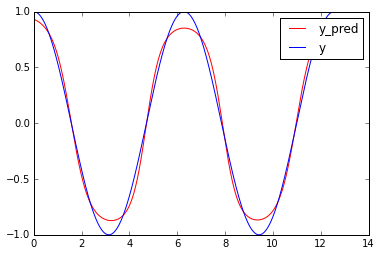

In [9]:
pl.plot(x, y_pred, c='r', label='y_pred')
pl.plot(x, y, c='b', label='y')
pl.legend()

## Playing with the number of hidden units

You might want to run the example multiple times as the random initialization influences the result quite a bit.

In [10]:
def train_plot_prediction(n_hidden):
    model = Sequential()
    model.add(Dense(1, n_hidden, init='lecun_uniform'))
    model.add(Activation('tanh'))
    model.add(Dense(n_hidden, 1, init='lecun_uniform'))
    model.add(Activation('tanh'))
    
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    
    history = model.fit(scaler.transform(X_train), y_train, nb_epoch=5, batch_size=64, shuffle=True,
                       verbose=False)
    
    y_pred = model.predict(scaler.transform(x.reshape(-1, 1)))
    
    pl.figure(figsize=(10, 4))
    pl.subplot(211)
    pl.title('train loss')
    pl.plot(history.epoch, history.history['loss'], label='loss')
    pl.subplot(212)
    pl.title('prediction vs ground truth')
    pl.plot(x, y_pred, c='r', label='y_pred')
    pl.plot(x, y, c='b', label='y')
    pl.legend()
    pl.tight_layout()

In [11]:
train_plot_prediction(1)

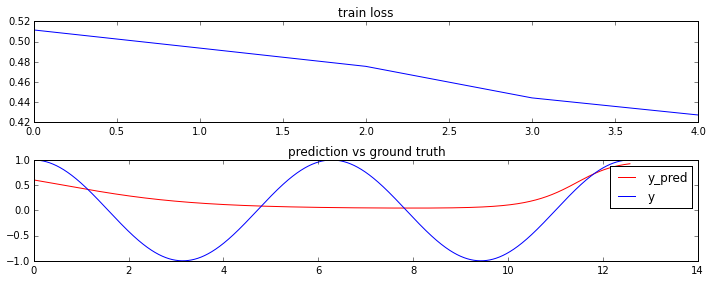

In [12]:
train_plot_prediction(2)

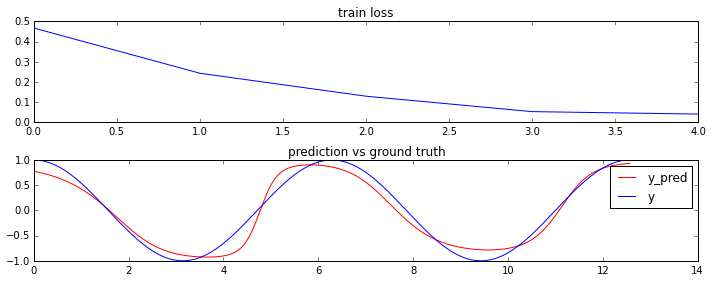

In [13]:
train_plot_prediction(3)

In [14]:
train_plot_prediction(4)

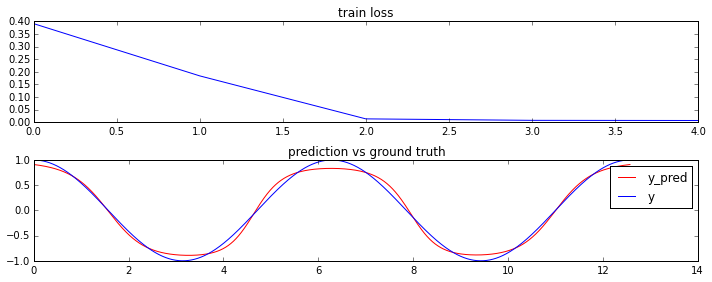

In [15]:
train_plot_prediction(5)

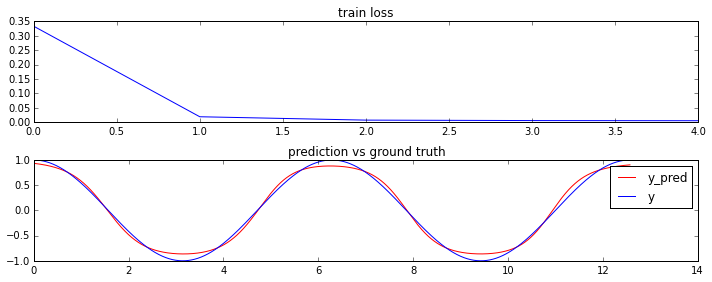

In [16]:
train_plot_prediction(10)

## With random forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, max_depth=10).fit(scaler.transform(X_train), y_train)

y_pred_rf = rf.predict(scaler.transform(x.reshape(-1, 1)))

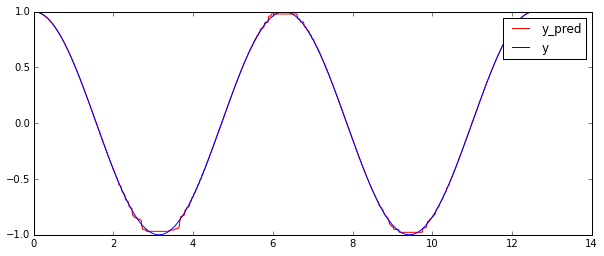

In [18]:
pl.figure(figsize=(10, 4))
pl.plot(x, y_pred_rf, c='r', label='y_pred')
pl.plot(x, y, c='b', label='y')
pl.legend()